In [184]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

In [228]:
train = pd.read_csv('data/train.csv')
train['FVCLag'] = train.FVC.shift(1)
train['PercentLag'] = train.Percent.shift(1)

uq = set()

for index, row in train.iterrows():
    if row['Patient'] not in uq:
        uq.add(row['Patient'])
        train.drop(index, axis=0, inplace=True)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,FVCLag,PercentLag
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,2315.0,58.253649
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,2214.0,55.712129
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,2061.0,51.862104
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,2144.0,53.950679
5,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker,2069.0,52.063412
...,...,...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked,2976.0,73.077301
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked,2712.0,66.594637
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked,2978.0,73.126412
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked,2908.0,71.407524


In [229]:
y = train["FVC"]
X = train.copy()
X=X.drop(columns = ["FVC", "Patient", "Percent"])
X['Sex'] = X['Sex'].map(lambda x: 1 if(x == "Male") else 0 )
X['SmokingStatus'] = X['SmokingStatus'].map(lambda x: 1 if(x == "Ex-smoker") else 0 )
X.head()

,Weeks,Age,Sex,SmokingStatus,FVCLag,PercentLag
1,5,79,1,1,2315.0,58.253649
2,7,79,1,1,2214.0,55.712129
3,9,79,1,1,2061.0,51.862104
4,11,79,1,1,2144.0,53.950679
5,17,79,1,1,2069.0,52.063412


In [230]:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=250, random_state=0)

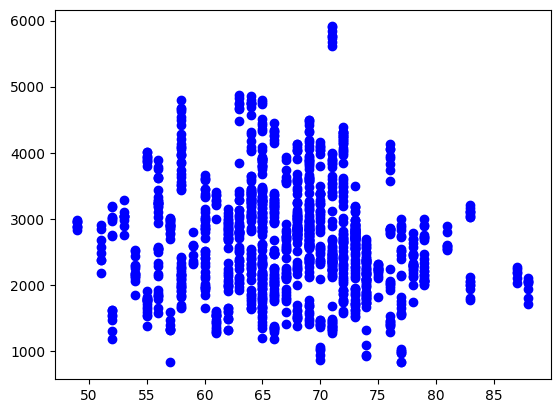

In [231]:
plt.scatter(X["Age"], y, color = 'blue') 


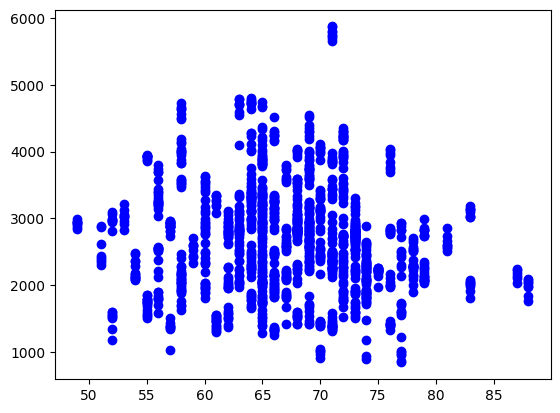

In [232]:
plt.scatter(X["Age"], regressor.predict(X), color="blue")

In [233]:
regressor.predict(X)

array([2225.   , 2141.04 , 2120.736, ..., 2862.528, 2929.796, 2815.468])

In [234]:
mean_squared_error(regressor.predict(X), y)

5210.934710793882

In [226]:
te = mean_squared_error(regressor.predict(XTe),yTe)
te

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by RandomForestRegressor.

In [118]:
tensor_x = torch.tensor((X['Age'], X['Weeks'], X['Percent'], X['Sex'], X['SmokingStatus'])).to(torch.float).T
tensor_y = torch.tensor(y).to(torch.float)


In [180]:
model = nn.Sequential(
#         nn.Linear(5, 100),
#         nn.ReLU(),
#         nn.Linear(100, 20),
#         nn.ReLU(),
#         nn.Linear(20, 1)
        nn.Linear(5,1)
        )

In [181]:
epochs = 2000
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()


for epoch in range(epochs):
    optimizer.zero_grad()  
    pred = model.forward(tensor_x)  # compute model predictions
    loss = loss_fn(pred.flatten(), tensor_y)
    loss.backward()  # compute the gradient wrt loss
    optimizer.step()  # performs a step of gradient descent
    if (epoch + 1) % 10 == 0:
        print('epoch {} loss {}'.format(epoch+1, loss.item()))

epoch 10 loss 71279728.0
epoch 20 loss 55198812.0
epoch 30 loss 42285668.0
epoch 40 loss 33508900.0
epoch 50 loss 30631494.0
epoch 60 loss 31026762.0
epoch 70 loss 30502384.0
epoch 80 loss 30543954.0
epoch 90 loss 30461410.0
epoch 100 loss 30464704.0
epoch 110 loss 30452302.0
epoch 120 loss 30449988.0
epoch 130 loss 30447370.0
epoch 140 loss 30445996.0
epoch 150 loss 30445194.0
epoch 160 loss 30444640.0
epoch 170 loss 30444340.0
epoch 180 loss 30444150.0
epoch 190 loss 30444044.0
epoch 200 loss 30443986.0
epoch 210 loss 30443956.0
epoch 220 loss 30443938.0
epoch 230 loss 30443930.0
epoch 240 loss 30443926.0
epoch 250 loss 30443924.0
epoch 260 loss 30443924.0
epoch 270 loss 30443920.0
epoch 280 loss 30443924.0
epoch 290 loss 30443924.0
epoch 300 loss 30443924.0
epoch 310 loss 30443924.0
epoch 320 loss 30443922.0
epoch 330 loss 30443922.0
epoch 340 loss 30443922.0
epoch 350 loss 30443922.0
epoch 360 loss 30443922.0
epoch 370 loss 30443922.0
epoch 380 loss 30443922.0
epoch 390 loss 304439

In [179]:
model.eval()

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)

In [152]:
test = pd.read_csv('data/test.csv')

yTe = train["FVC"]
XTe = train.copy()
XTe=XTe.drop(columns = ["FVC", "Patient"])
XTe['Sex'] = XTe['Sex'].map(lambda x: 1 if(x == "Male") else 0 )
XTe['SmokingStatus'] = XTe['SmokingStatus'].map(lambda x: 1 if(x == "Ex-smoker") else 0 )

xTe = torch.tensor((XTe['Age'], XTe['Weeks'], XTe['Percent'], XTe['Sex'], XTe['SmokingStatus'])).to(torch.float).T
yTe = torch.tensor(yTe).to(torch.float)

In [153]:
loss = nn.MSELoss()

loss = (loss(model.forward(xTe).flatten(), yTe))
print('loss {}'.format(loss.item()))

loss 693059.75
